In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('data/titles.csv')
titles = titles[titles['year'] <= 2015]
titles.head()

,title,year
0,Berlian si Etty,2013
1,The Mighty,1929
2,Little Black Spiders,2012
3,Twelve O'Clock High,1949
4,D4,2011


In [13]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Natas es Satan,1977,Ramon 'Cartucho' Pena,actor,Nigth Club Owner,NaN
2,Los tarantos,1963,'El Guisa',actor,Bailaor,25.0
3,Los tarantos,1963,'El Viti',actor,Cantaor,20.0
4,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

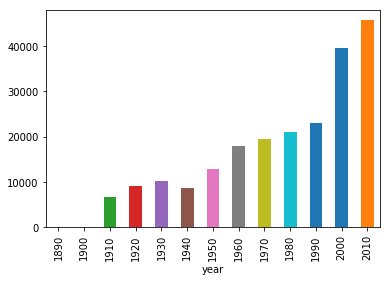

In [10]:
t=titles.groupby(titles['year']//10*10).size()
t.plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

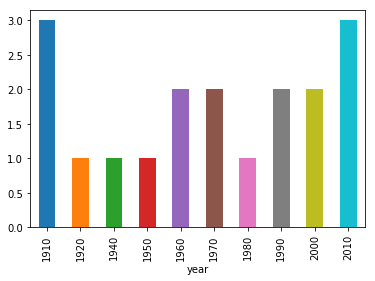

In [12]:
t=titles[titles['title']=='Hamlet'].groupby(titles['year']//10*10).size()
t.plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [22]:
c=cast[(cast['year']>=1950) & (cast['year']<=1959) & (cast['n']==1) ].groupby(['type','year']).size()
c.unstack('type').fillna(0)

type,actor,actress
year,,
1950,625,288
1951,651,285
1952,613,303
1953,664,313
1954,636,315
1955,649,285
1956,668,306
1957,739,314
1958,716,300


### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [23]:
c=cast[(cast['year']>=1950) & (cast['year']<=1959) & (cast['n']>=1) & (cast['n']<=5)].groupby(['type','n']).size()
c.unstack('type').fillna(0)

type,actor,actress
n,,
1.0,6694,3036
2.0,4641,4632
3.0,5655,3199
4.0,5665,2879
5.0,5674,2591


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [48]:
grp=cast[cast['name']=='Frank Oz'].groupby(['year','title'])
grp.filter(lambda x: len(x) > 1).groupby(['year','title']).size()

year  title                         
1979  The Muppet Movie                  8
1981  An American Werewolf in London    2
      The Great Muppet Caper            6
1982  The Dark Crystal                  2
1984  The Muppets Take Manhattan        7
1985  Follow That Bird                  3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [50]:
grp=cast[cast['name']=='Frank Oz'].groupby(['character'])
grp.filter(lambda x: len(x) > 1).groupby(['character']).size()

character
Animal            3
Bert              2
Cookie Monster    2
Fozzie Bear       2
Miss Piggy        4
Sam the Eagle     3
Yoda              2
dtype: int64